In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import datetime
import warnings
warnings.filterwarnings('ignore')

In [540]:
data_path = 'data/load_data.csv'
df = pd.read_csv(data_path)

In [541]:
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             33482 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64
 4   CO2(tCO2)                             34586 non-null  float64
 5   Lagging_Current_Power_Factor          34691 non-null  float64
 6   Leading_Current_Power_Factor          33570 non-null  float64
 7   NSM                                   34586 non-null  float64
 8   Load_Type                             35041 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


In [543]:
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh','CO2(tCO2)': 'CO2'}, inplace=True)

In [544]:
missing_perc = df.isnull().sum()/len(df)*100
print(missing_perc)

Date_Time                               0.000000
Usage_kWh                               4.449074
Lagging_Current_Reactive_Power_kVarh    2.499929
Leading_Current_Reactive_Power_kVarh    3.298993
CO2                                     1.298479
Lagging_Current_Power_Factor            0.998830
Leading_Current_Power_Factor            4.197940
NSM                                     1.298479
Load_Type                               0.000000
dtype: float64


In [545]:
df['Usage_kWh'] = df['Usage_kWh'].fillna(df['Usage_kWh'].median())
df['Lagging_Current_Reactive_Power_kVarh'] = df['Lagging_Current_Reactive_Power_kVarh'].fillna(df['Lagging_Current_Reactive_Power_kVarh'].median())
df['Leading_Current_Reactive_Power_kVarh'] = df['Leading_Current_Reactive_Power_kVarh'].fillna(df['Leading_Current_Reactive_Power_kVarh'].median())
df['CO2'] = df['CO2'].fillna(method='ffill')
df['Lagging_Current_Power_Factor'] = df['Lagging_Current_Power_Factor'].fillna(df['Lagging_Current_Power_Factor'].mean())
df['Leading_Current_Power_Factor'] = df['Leading_Current_Power_Factor'].fillna(df['Leading_Current_Power_Factor'].mean())
df['NSM'] = df['NSM'].interpolate()


In [546]:
missing_perc = df.isnull().sum()/len(df)*100
print(missing_perc)

Date_Time                               0.0
Usage_kWh                               0.0
Lagging_Current_Reactive_Power_kVarh    0.0
Leading_Current_Reactive_Power_kVarh    0.0
CO2                                     0.0
Lagging_Current_Power_Factor            0.0
Leading_Current_Power_Factor            0.0
NSM                                     0.0
Load_Type                               0.0
dtype: float64


In [547]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35041.000000,35041.000000,35041.00000,35041.000000,35041.000000,35041.000000,35041.000000
mean,29.734851,14.466466,4.24140,0.012924,90.740871,94.926552,48003.510654
std,40.825418,20.141795,8.97324,0.019696,39.546396,48.769778,34008.136986
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.350000,2.560000,0.00000,0.000000,66.660000,95.020000,22500.000000
50%,5.290000,5.180000,0.00000,0.000000,90.260000,100.000000,45000.000000
75%,51.730000,22.750000,1.51000,0.020000,100.000000,100.000000,68400.000000
max,435.019069,262.630718,78.80900,0.188166,299.996814,299.969494,248821.810465


In [548]:

df['Hours'] = (df['NSM'] % 86400) // 3600
df['Lagging_Current_Power_Factor'] = df['Lagging_Current_Power_Factor'].clip(upper=100)
df['Leading_Current_Power_Factor'] = df['Leading_Current_Power_Factor'].clip(upper=100)
#df['Has_Leading_Reactive'] = df['Leading_Current_Reactive_Power_kVarh'].apply(lambda x: 1 if x > 0 else 0)
df['Usage_kWh_log'] = np.log1p(df['Usage_kWh'])
df['Lagging_Reactive_log'] = np.log1p(df['Lagging_Current_Reactive_Power_kVarh'])

In [549]:
df.tail()

,Date_Time,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Hours,Usage_kWh_log,Lagging_Reactive_log
35036,31-12-2018 23:15,3.74,3.74,0.000000,0.0,70.71,100.000000,83700.000000,Light_Load,23.0,1.556037,1.556037
35037,31-12-2018 23:30,3.78,3.17,0.070000,0.0,76.62,99.980000,157160.395291,Light_Load,19.0,1.564441,1.427916
35038,31-12-2018 23:45,3.78,3.06,0.110000,0.0,100.00,99.960000,85500.000000,Light_Load,23.0,1.564441,1.401183
35039,31-12-2018 00:00,3.67,3.02,0.174801,0.0,77.22,94.926552,0.000000,Light_Load,0.0,1.541159,1.391282
35040,31-12-2018 20:00,5.29,0.00,20.100000,0.0,100.00,20.190000,72000.000000,Light_Load,20.0,1.838961,0.000000


In [550]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['load_level_encoded'] = le.fit_transform(df['Load_Type'])
print("Label classes:", le.classes_)

Label classes: ['Light_Load' 'Maximum_Load' 'Medium_Load']


In [551]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True)
df.set_index('Date_Time', inplace=True)

In [552]:
df.drop(columns=['Load_Type'], inplace=True)

In [553]:
df = df.resample('H').mean()
df['Has_Leading_Reactive'] = df['Leading_Current_Reactive_Power_kVarh'].apply(lambda x: 1 if x > 0 else 0)

In [554]:
df['Signed_Power_Factor'] = (
    df['Lagging_Current_Power_Factor'] - df['Leading_Current_Power_Factor']
)
df['pf_type'] = df['Signed_Power_Factor'].apply(
    lambda x: '1' if x > 0 else '0' 
)# pf is power factor type


In [555]:
df.reset_index(inplace=True)
drop_cols = ['Date_Time', 'Usage_kWh','CO2', 'Lagging_Current_Reactive_Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','Signed_Power_Factor','load_level_encoded']
feature_cols = [col for col in df.columns if col not in drop_cols]
feature_cols = list(set(feature_cols))

In [556]:
feature_cols

['Hours',
 'Lagging_Reactive_log',
 'Usage_kWh_log',
 'Has_Leading_Reactive',
 'pf_type']

In [557]:
def mapping_unique(value):
    if value < 0.66:
        return 0  
    elif value < 1.32:
        return 1  
    else:
        return 2  

In [558]:
x = df[feature_cols]
y = df['load_level_encoded']
df['load_level_encoded'] = df['load_level_encoded'].apply(mapping_unique)

In [559]:
y = df['load_level_encoded']
y.value_counts()

load_level_encoded
0    4518
2    2424
1    1818
Name: count, dtype: int64

In [560]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [561]:
x_scaled

array([[-1.67328268, -0.37769631, -0.73205062, -0.85431717, -0.62223259],
       [-1.59670164, -0.30259244, -0.89931395, -0.85431717, -0.62223259],
       [-1.36695851, -0.26430403, -0.79366519, -0.85431717, -0.62223259],
       ...,
       [ 0.96876331, -1.64712457, -0.84187843,  1.17052547,  1.60711608],
       [ 1.31337801, -0.61792473, -0.83093362,  1.17052547,  1.60711608],
       [ 1.61970218, -0.34964791, -0.84727188,  1.17052547, -0.62223259]],
      shape=(8760, 5))

In [562]:
import seaborn as sns

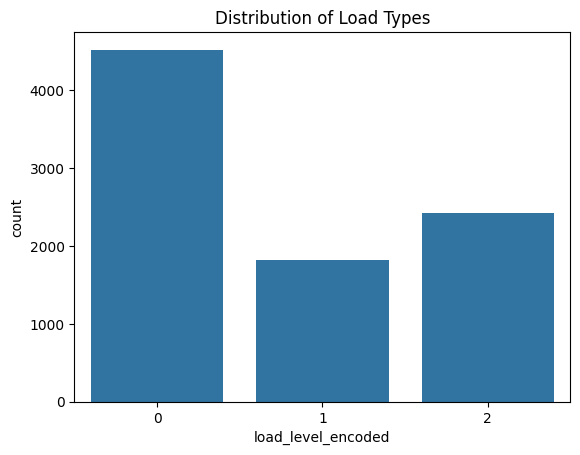

In [563]:
sns.countplot(x=y)
plt.title('Distribution of Load Types')
plt.show()

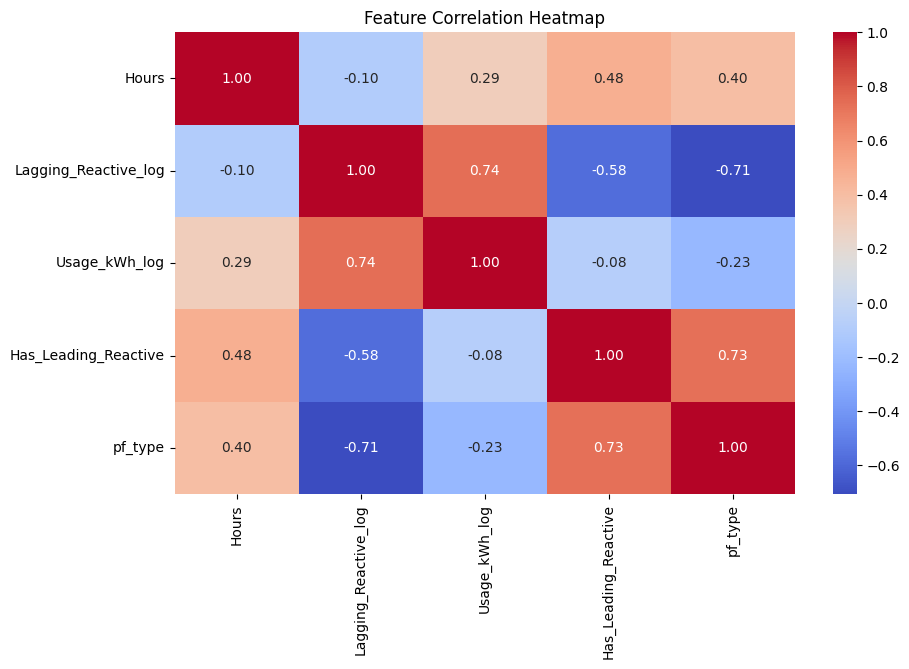

In [564]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [565]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)



(7884, 5) (876, 5) (7884,) (876,)


In [566]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

In [567]:
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [568]:
accuracy_score(y_test, lr_pred)

0.776255707762557

In [569]:
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, lr_pred, target_names=le.classes_))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  Light_Load       0.91      0.93      0.92       464
Maximum_Load       0.56      0.54      0.55       160
 Medium_Load       0.65      0.65      0.65       252

    accuracy                           0.78       876
   macro avg       0.71      0.71      0.71       876
weighted avg       0.77      0.78      0.77       876



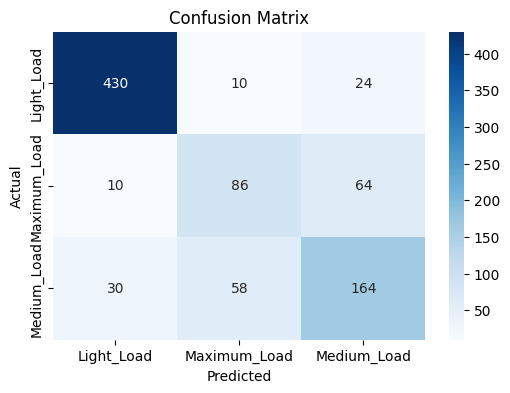

In [570]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [571]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [572]:
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [573]:
accuracy_score(y_test, rf_pred)

0.8070776255707762

In [574]:
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, rf_pred, target_names=le.classes_))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  Light_Load       0.94      0.94      0.94       464
Maximum_Load       0.60      0.63      0.62       160
 Medium_Load       0.70      0.67      0.69       252

    accuracy                           0.81       876
   macro avg       0.75      0.75      0.75       876
weighted avg       0.81      0.81      0.81       876



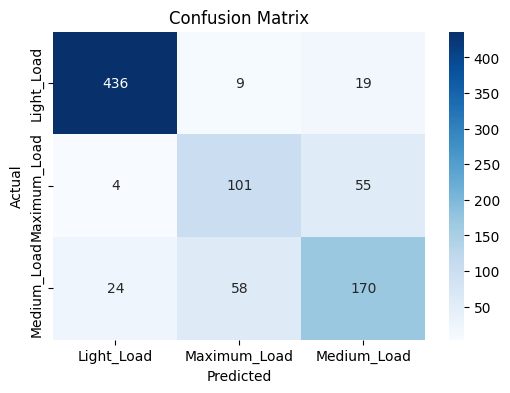

In [575]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [576]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,         
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [577]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)
best_rf.fit(x_train, y_train)
best_rf_pred = best_rf.predict(x_test)
print("the accuracy of the model with best parameters is:",accuracy_score(y_test,best_rf_pred))

the accuracy of the model with best parameters is: 0.8378995433789954


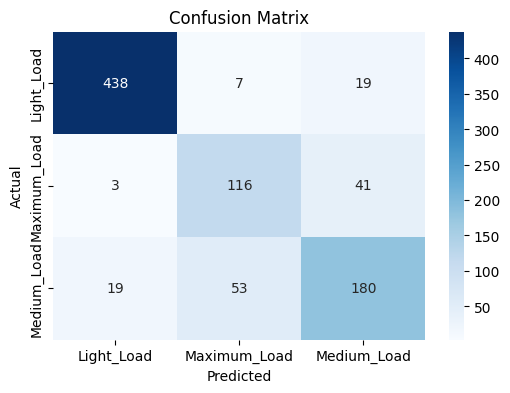

In [578]:
cm = confusion_matrix(y_test, best_rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [579]:
len(x_test)

876